In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
who_data = pd.read_csv('https://covid.ourworldindata.org/data/full_data.csv')

In [3]:
t0_threshold = 100
who_data_t0 = who_data.query('total_cases >= @t0_threshold')

In [4]:
t0_date = who_data_t0.groupby('location').min()['date']

In [5]:
who_data_t0.loc[:, 't0_date'] = who_data_t0['location'].map(t0_date)

In [6]:
who_data_t0.loc[:, 'since_t0'] = pd.to_datetime(who_data_t0['date']) - pd.to_datetime(who_data_t0['t0_date'])
who_data_t0.loc[:, 'since_t0']  = who_data_t0['since_t0'].map(lambda x: x.days)

In [7]:
who_data_t0['location'].value_counts().sort_values(ascending=False).keys()

Index(['World', 'China', 'International', 'South Korea', 'Japan', 'Italy',
       'Iran', 'Singapore', 'France', 'Germany', 'Spain', 'United States',
       'United Kingdom', 'Netherlands', 'Switzerland', 'Sweden', 'Norway',
       'Belgium', 'Austria', 'Bahrain', 'Malaysia', 'Denmark', 'Australia',
       'Qatar', 'Canada', 'Czech Republic', 'Finland', 'Kuwait', 'Slovenia',
       'Israel', 'Portugal'],
      dtype='object')

In [8]:
country_filter = ['China', 'South Korea', 'Italy', 'Iran', 'United States']

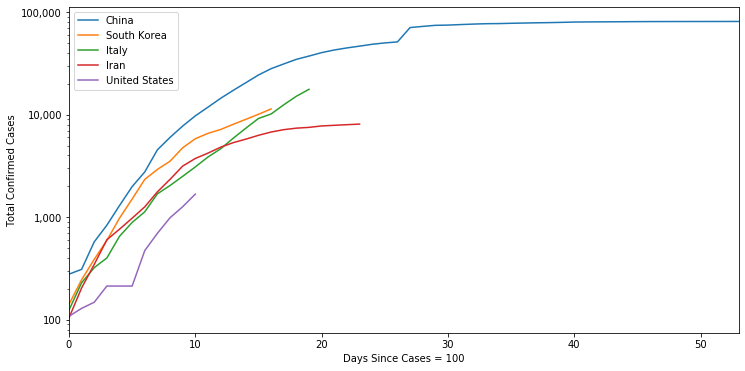

In [9]:
ax = plt.gca()
p=who_data_t0[who_data_t0['location'].isin(country_filter)].groupby('location').plot(x='since_t0', y='total_cases', ax=ax, logy=True)
ax.figure.set_size_inches(12,6)
ax.legend(country_filter)
ax.set_xlabel('Days Since Cases = 100')
ax.set_ylabel('Total Confirmed Cases')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))